In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data Explore

In [2]:
data = pd.read_excel('brent.xls')
data = data.set_index('Дата')
print(data.shape)
data.head()

(779, 3)


,USD,EUR,Brent
Дата,,,
2007-01-01,26.3311,34.6965,59.44
2007-01-02,26.3311,34.6965,60.44
2007-01-03,26.3311,34.6965,57.96
2007-01-04,26.3311,34.6965,55.11
2007-01-05,26.3311,34.6965,55.64


In [3]:
data.corr()

,USD,EUR,Brent
USD,1.000000,0.800010,-0.074584
EUR,0.800010,1.000000,-0.047396
Brent,-0.074584,-0.047396,1.000000


Посмотрим на графики цен акций с течением времени

<AxesSubplot:xlabel='Дата'>

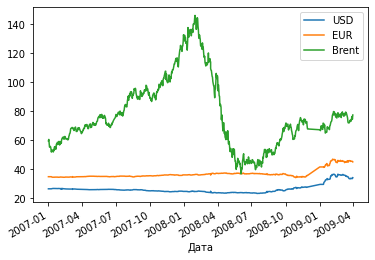

In [4]:
data.plot()

## 2. Метод `PCA`

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.vector_ar.var_model import VAR

### 2.1 `StandardScaler()`

In [6]:
X = data.values
X_std = StandardScaler().fit_transform(X)

In [7]:
mu, sigma = X.mean(axis=0), X.std(axis=0)

### 2.2 `Train | Test`

In [8]:
n = 500
X_train, X_test, dat_train, dat_test = X_std[:n], X_std[n:], \
                                        list(data.index)[:n], list(data.index)[n:]
X_train.shape, X_test.shape

((500, 3), (279, 3))

### 2.3 `PCA` - главные компоненты

In [9]:
pca = PCA()
pca.fit(X_train)

PCA()

### 2.4 Восстановление переменных

In [19]:
nComp = 2
X_fit = mu + sigma * np.dot(pca.transform(X_train)[:,:nComp], 
              pca.components_[:nComp,:])

In [20]:
X_pred = mu + sigma * np.dot(pca.transform(X_test)[:,:nComp], 
              pca.components_[:nComp,:])

## 2.5 `Сравнение предсказаний`

## `0` components

In [21]:
nComp = 0
X_fit = mu + sigma * np.dot(pca.transform(X_train)[:,:nComp], 
              pca.components_[:nComp,:])
X_pred = mu + sigma * np.dot(pca.transform(X_test)[:,:nComp], 
              pca.components_[:nComp,:])

In [22]:
df_fit = pd.DataFrame(X_fit, index=dat_train, columns=data.columns)
df_fit

,USD,EUR,Brent
2007-01-01,26.024379,36.555363,77.972285
2007-01-02,26.024379,36.555363,77.972285
2007-01-03,26.024379,36.555363,77.972285
2007-01-04,26.024379,36.555363,77.972285
2007-01-05,26.024379,36.555363,77.972285
...,...,...,...
2008-05-12,26.024379,36.555363,77.972285
2008-05-13,26.024379,36.555363,77.972285
2008-05-14,26.024379,36.555363,77.972285
2008-05-15,26.024379,36.555363,77.972285


In [23]:
df_pred = pd.DataFrame(X_pred, index=dat_test, columns=data.columns)
df_pred

,USD,EUR,Brent
2008-05-17,26.024379,36.555363,77.972285
2008-05-18,26.024379,36.555363,77.972285
2008-05-19,26.024379,36.555363,77.972285
2008-05-20,26.024379,36.555363,77.972285
2008-05-21,26.024379,36.555363,77.972285
...,...,...,...
2009-03-27,26.024379,36.555363,77.972285
2009-03-28,26.024379,36.555363,77.972285
2009-03-29,26.024379,36.555363,77.972285
2009-03-30,26.024379,36.555363,77.972285


In [24]:
def MAPE(y_true, y_pred):
    '''
    MAPE: mean absolute percentage error
    '''
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def MSE(y_true, y_pred):
    '''
    MSE: mean squared error
    '''
    return np.mean((y_true - y_pred)**2)

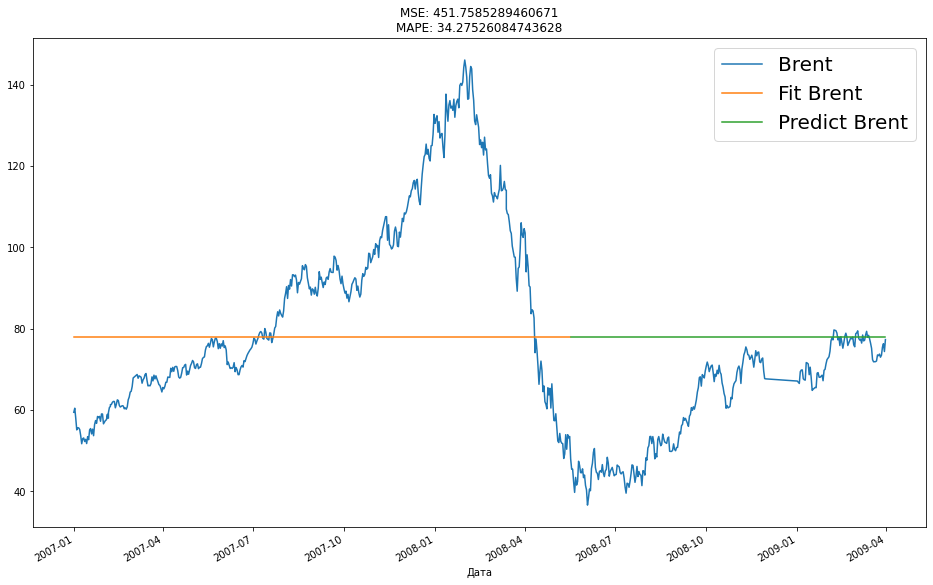

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 2].plot(label='Brent')
df_fit.iloc[:, 2].plot(label='Fit Brent')
df_pred.iloc[:, 2].plot(label='Predict Brent')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}\nMAPE: {MAPE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}')
plt.show()

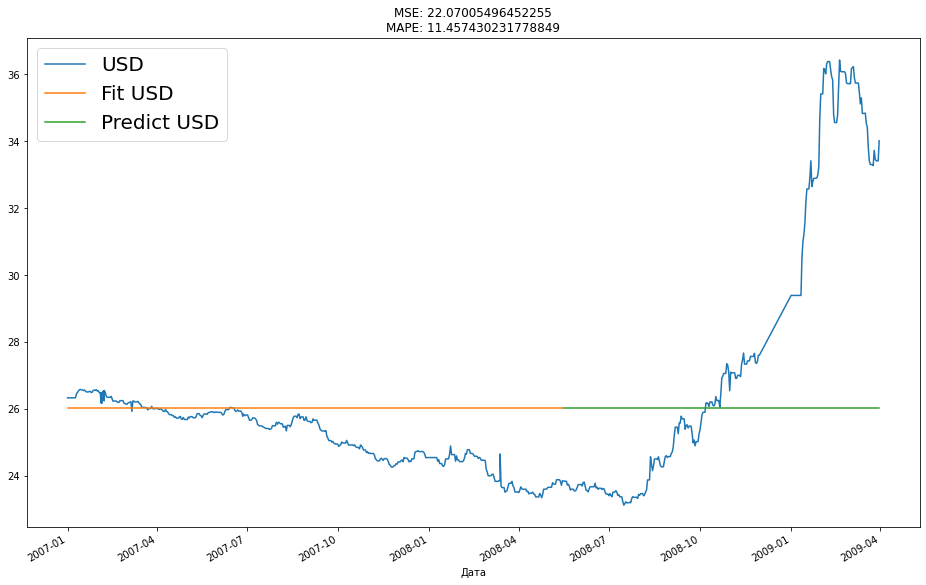

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 0].plot(label='USD')
df_fit.iloc[:, 0].plot(label='Fit USD')
df_pred.iloc[:, 0].plot(label='Predict USD')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}\nMAPE: {MAPE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}')
plt.show()

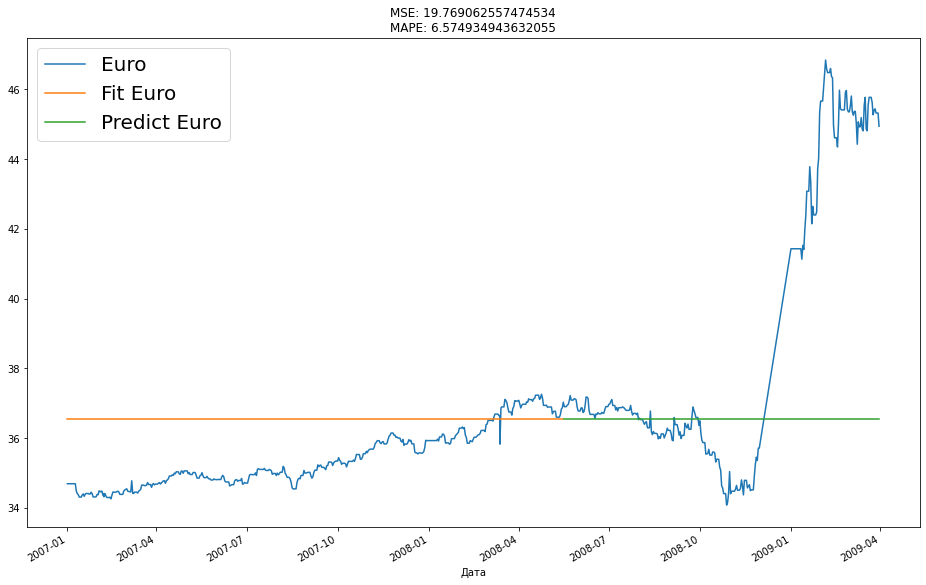

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 1].plot(label='Euro')
df_fit.iloc[:, 1].plot(label='Fit Euro')
df_pred.iloc[:, 1].plot(label='Predict Euro')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}\nMAPE: {MAPE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}')
plt.show()

## `1` Components

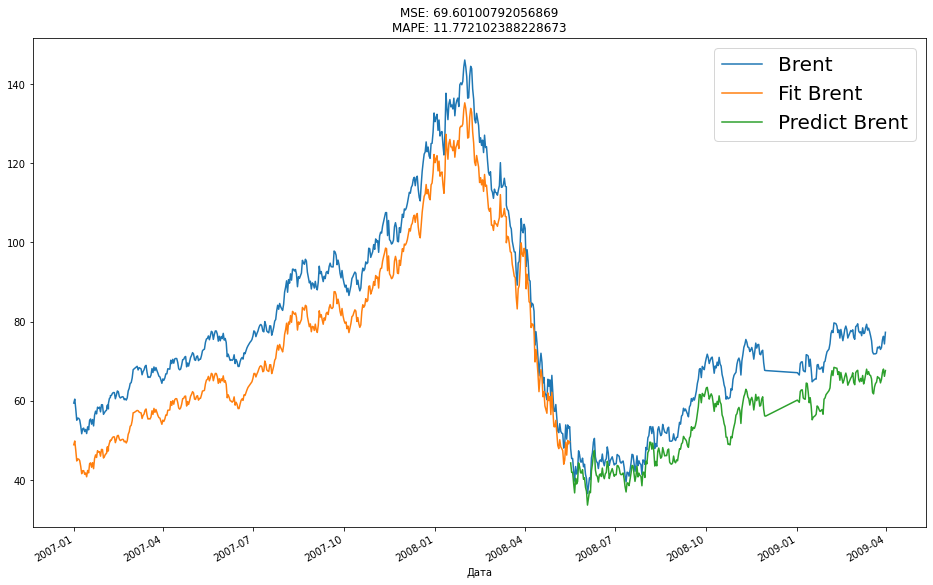

In [28]:
nComp = 1
X_fit = mu + sigma * np.dot(pca.transform(X_train)[:,:nComp], 
              pca.components_[:nComp,:])
X_pred = mu + sigma * np.dot(pca.transform(X_test)[:,:nComp], 
              pca.components_[:nComp,:])
df_fit = pd.DataFrame(X_fit, index=dat_train, columns=data.columns)
df_pred = pd.DataFrame(X_pred, index=dat_test, columns=data.columns)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 2].plot(label='Brent')
df_fit.iloc[:, 2].plot(label='Fit Brent')
df_pred.iloc[:, 2].plot(label='Predict Brent')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}\nMAPE: {MAPE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}')
plt.show()

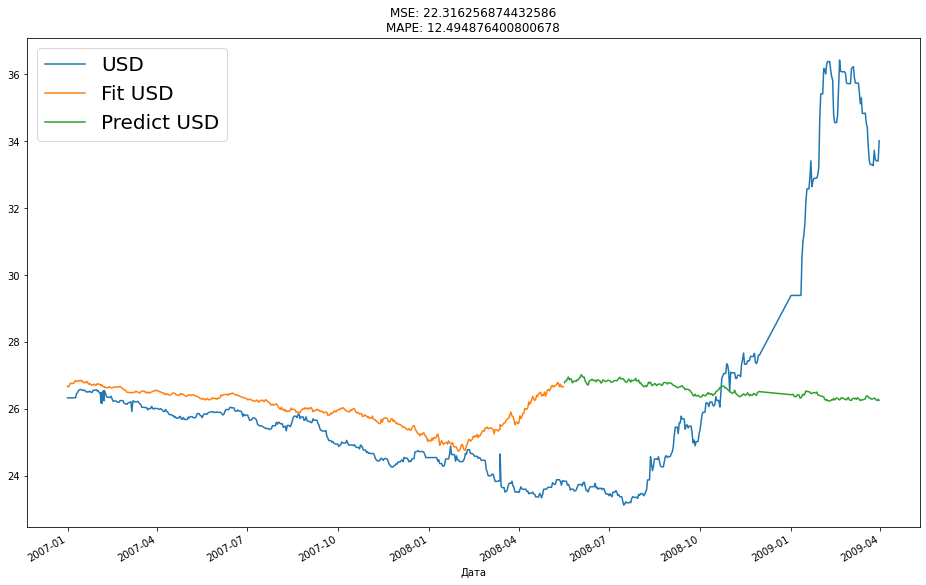

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 0].plot(label='USD')
df_fit.iloc[:, 0].plot(label='Fit USD')
df_pred.iloc[:, 0].plot(label='Predict USD')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}\nMAPE: {MAPE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}')
plt.show()

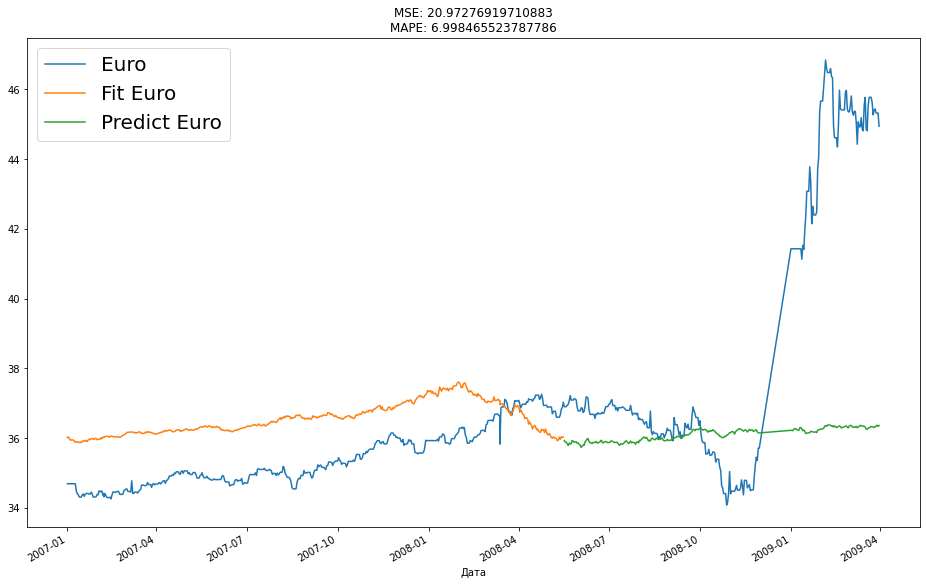

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 1].plot(label='Euro')
df_fit.iloc[:, 1].plot(label='Fit Euro')
df_pred.iloc[:, 1].plot(label='Predict Euro')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}\nMAPE: {MAPE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}')
plt.show()

## `2` components

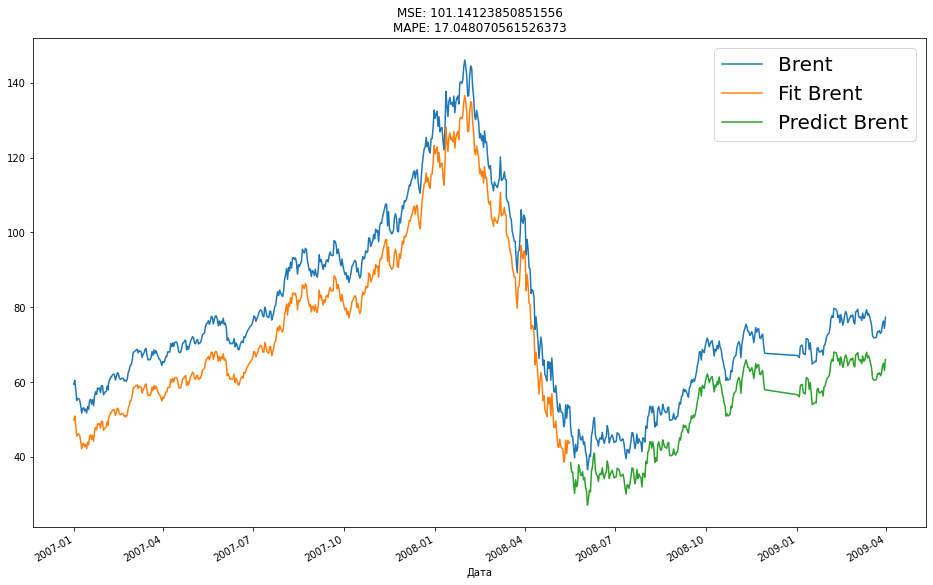

In [31]:
nComp = 2
X_fit = mu + sigma * np.dot(pca.transform(X_train)[:,:nComp], 
              pca.components_[:nComp,:])
X_pred = mu + sigma * np.dot(pca.transform(X_test)[:,:nComp], 
              pca.components_[:nComp,:])
df_fit = pd.DataFrame(X_fit, index=dat_train, columns=data.columns)
df_pred = pd.DataFrame(X_pred, index=dat_test, columns=data.columns)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 2].plot(label='Brent')
df_fit.iloc[:, 2].plot(label='Fit Brent')
df_pred.iloc[:, 2].plot(label='Predict Brent')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}\nMAPE: {MAPE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}')
plt.show()

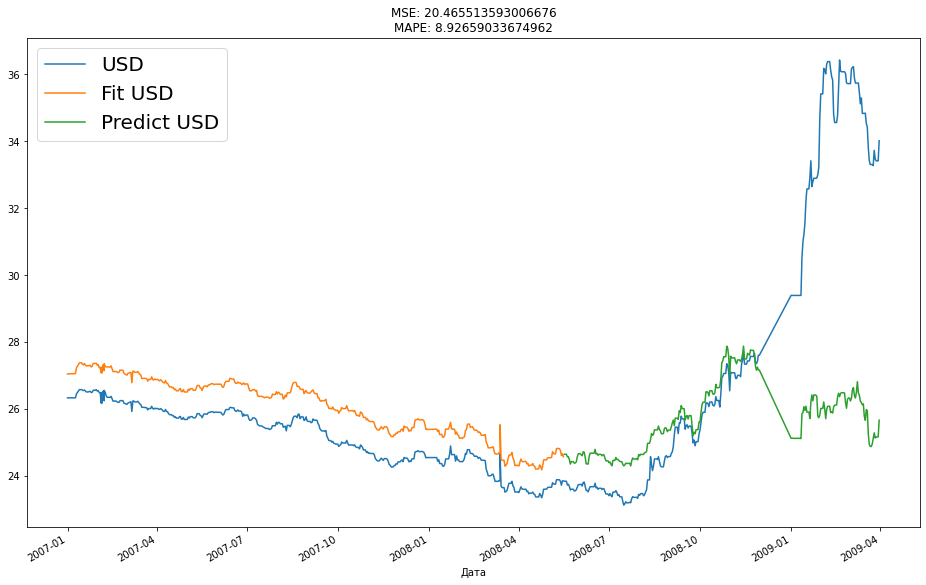

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 0].plot(label='USD')
df_fit.iloc[:, 0].plot(label='Fit USD')
df_pred.iloc[:, 0].plot(label='Predict USD')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}\nMAPE: {MAPE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}')
plt.show()

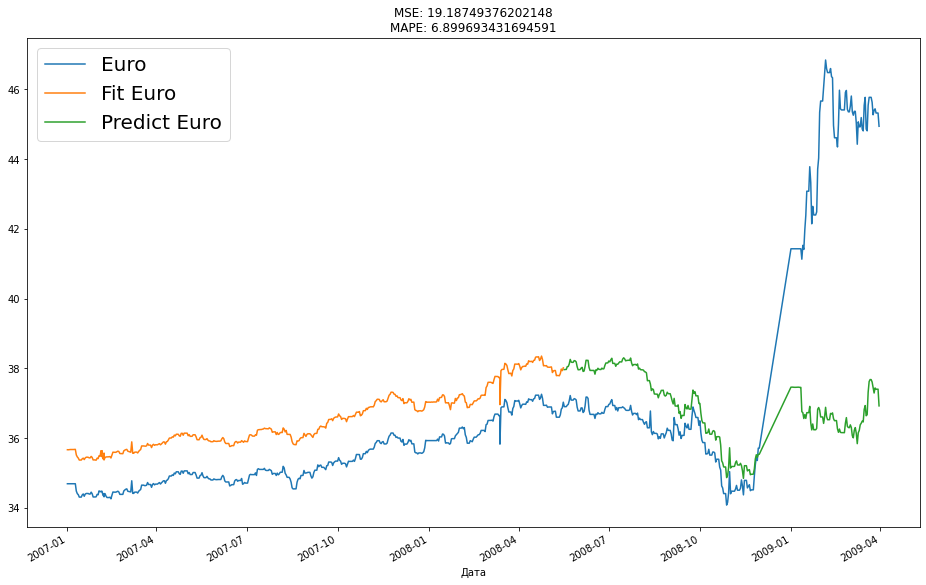

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 1].plot(label='Euro')
df_fit.iloc[:, 1].plot(label='Fit Euro')
df_pred.iloc[:, 1].plot(label='Predict Euro')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}\nMAPE: {MAPE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}')
plt.show()

## `3` components

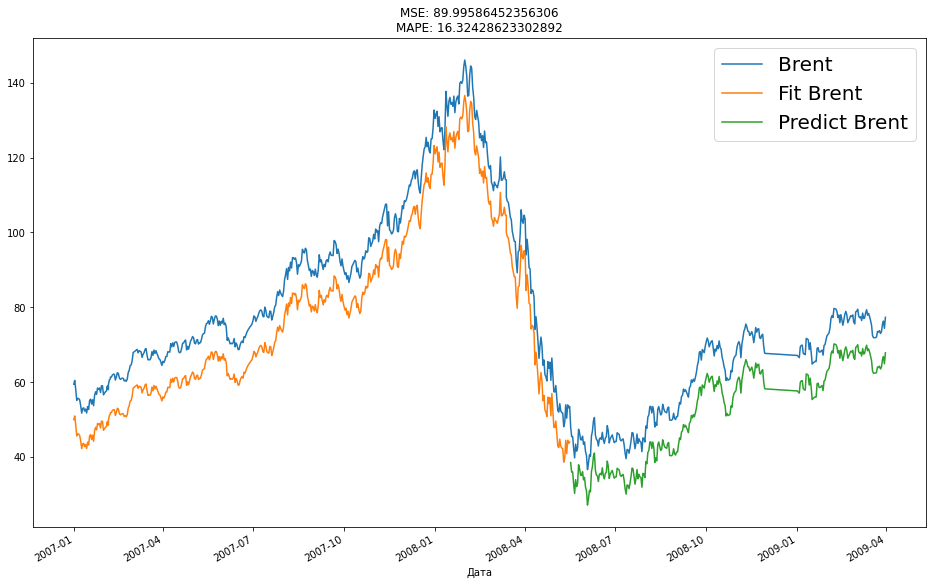

In [34]:
nComp = 3
X_fit = mu + sigma * np.dot(pca.transform(X_train)[:,:nComp], 
              pca.components_[:nComp,:])
X_pred = mu + sigma * np.dot(pca.transform(X_test)[:,:nComp], 
              pca.components_[:nComp,:])
df_fit = pd.DataFrame(X_fit, index=dat_train, columns=data.columns)
df_pred = pd.DataFrame(X_pred, index=dat_test, columns=data.columns)
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 2].plot(label='Brent')
df_fit.iloc[:, 2].plot(label='Fit Brent')
df_pred.iloc[:, 2].plot(label='Predict Brent')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}\nMAPE: {MAPE(data.iloc[:, 2][n:], df_pred.iloc[:, 2])}')
plt.show()

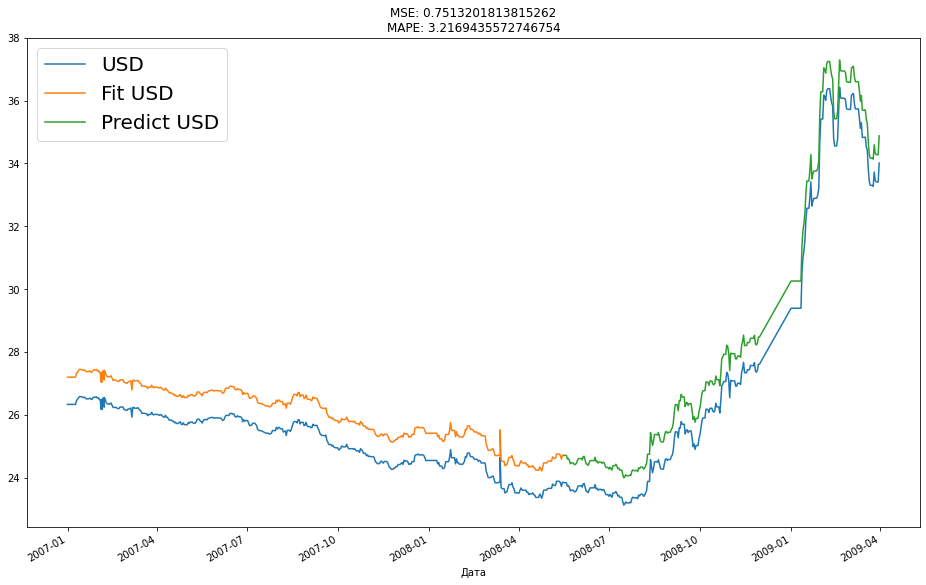

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 0].plot(label='USD')
df_fit.iloc[:, 0].plot(label='Fit USD')
df_pred.iloc[:, 0].plot(label='Predict USD')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}\nMAPE: {MAPE(data.iloc[:, 0][n:], df_pred.iloc[:, 0])}')
plt.show()

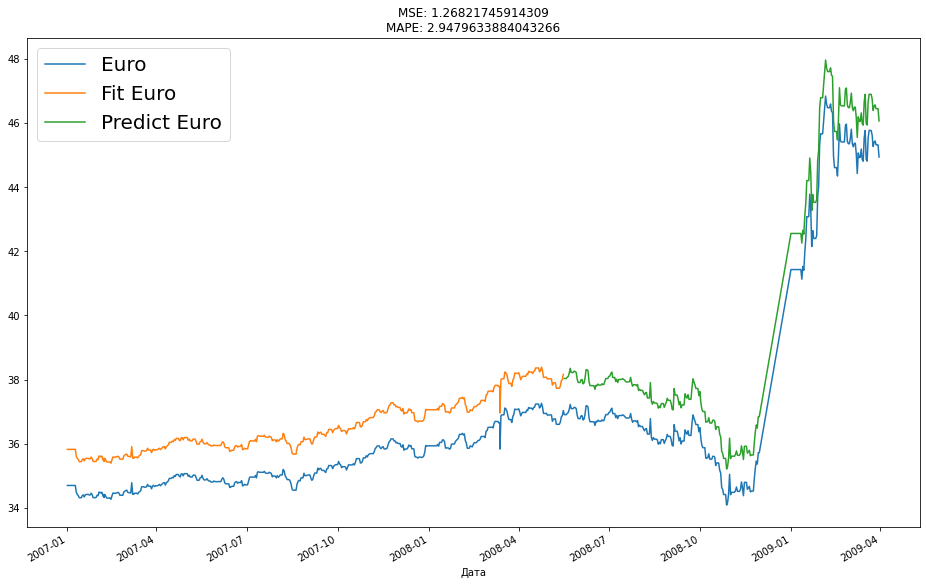

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
data.iloc[:, 1].plot(label='Euro')
df_fit.iloc[:, 1].plot(label='Fit Euro')
df_pred.iloc[:, 1].plot(label='Predict Euro')
ax.legend(fontsize=20)
ax.legend(fontsize=20)
ax.set_title(f'MSE: {MSE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}\nMAPE: {MAPE(data.iloc[:, 1][n:], df_pred.iloc[:, 1])}')
plt.show()

## 3. Сравнение с `SSA`

In [37]:
import numpy as np
import scipy
import scipy.linalg
class SingularSpectrumAnalysis():
    def __init__(self):
        pass
        
    def step_1(self, F, L):
        '''
        L: int
            ширина окна
        '''
        X = scipy.linalg.hankel(c=F[:L], 
                                r=F[L-1:])
        return X
    
    def step_2(self, X):
        '''
        X: np.ndarray L x K
            траекторная матрица
        '''
        U, Sigma, V = scipy.linalg.svd(X)
        V = V.T
        d = np.linalg.matrix_rank(X)
        return U, Sigma, V, d
    
    def step_3(self, U, Sigma, V, d, X):
        '''
        группировка собственных троек
        '''
        X_elem = np.array([Sigma[i] * np.outer(U[:,i], V[:,i]) for i in range(0, d)])
        if not np.allclose(X, X_elem.sum(axis=0), atol=1e-10):
            print("Предуреждение: SVD проделано неверно..")
        return X_elem
    
    def step_4(self, Y):
        '''
        Y: np.ndarray
        
        Output:
            возвращает диагональное усреднение
        '''
        L = min(Y.shape)
        K = max(Y.shape)
        N = L + K - 1
        if L < K:
            Y_ = Y
        elif L >= K:
            Y_ = Y.T
        g_1 = np.array([1 / (k + 1) * np.sum([Y_[m, k-m] for m in range(k+1)]) for k in range(0, L-1)])
        g_2 = np.array([1 / (L-1) * np.sum([Y_[m, k-m] for m in range(0, L-1)]) for k in range(L-1, K)])
        g_3 = np.array([1 / (N-k) * np.sum([Y_[m, k-m] for m in range(k-K+1, N-K+1)]) for k in range(K, N)])
        return np.r_[g_1,g_2,g_3]
        
    def fit(self, F, n_components, L='default'):
        '''
        F: np.ndarray
            train_data
        n_components : int
            количество рядов
        L : int
            ширина окна, default int(F.shape[0] / 2)
        '''
        N = F.shape[0]
        if L == 'default':
            L = np.int(N / 2)
        if n_components > L:
            raise ValueError(f'n_components = {n_components} should be less, than L = {L}')
        K = N - L + 1
        X = self.step_1(F, L)
        U, Sigma, V, d = self.step_2(X)
        X_elem = self.step_3(U, Sigma, V, d, X)
        self.g = np.array([self.step_4(x) for x in X_elem])
        return self.g[:n_components, :].sum(axis=0)
    
    def predict(self, x, L, n_components, day_to_forecast, eps=None, max_iter=100) -> np.ndarray:
        """
        x : np.ndarray
            исходный временной ряд
        L : int
            ширина окна
        n_components : int
            количество рядов
        day_to_forecast : int
            на сколько времени предсказать
        eps : float
            точность сходимости итерационного метода
        max_iter : int
            максимальное количество итераций
        """
        if not eps:
            eps = 0.0001 * (np.max(x) - np.min(x))
        forecast = np.zeros(day_to_forecast)
        for i in range(day_to_forecast):
            x = np.append(x, x[-1])
            yq = x[-1]
            y = yq + 2 * eps
            current_iteration = max_iter
            while abs(y - yq) > eps:
                yq = x[-1]
                x_recurrent = self.fit(F=x, n_components=n_components, L=L)
                y = x_recurrent[-1]
                x[-1] = y
                current_iteration -= 1
                if current_iteration <= 0: break
            forecast[i] = x[-1]
        return forecast

In [41]:
f1, f2, f3 = X[:, 0], X[:, 1], X[:, 2]

In [50]:
n=750
X_train_ssa_1, X_test_ssa_1 = f1[:n], f1[n:]
X_train_ssa_2, X_test_ssa_2 = f2[:n], f2[n:]
X_train_ssa_3, X_test_ssa_3 = f3[:n], f3[n:]

In [58]:
SSA = SingularSpectrumAnalysis()
forecast_1 = SSA.predict(X_train_ssa_1, L='default', n_components=6, day_to_forecast=X_test_ssa_1.shape[0], max_iter=10)

In [59]:
forecast_2 = SSA.predict(X_train_ssa_2, L='default', n_components=6, day_to_forecast=X_test_ssa_2.shape[0])

In [92]:
forecast_3 = SSA.predict(X_train_ssa_3, L='default', n_components=6, day_to_forecast=X_test_ssa_3.shape[0], max_iter=4)

In [83]:
fit_3 = SSA.fit(X_train_ssa_3, n_components=6)

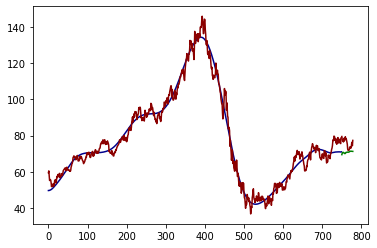

In [95]:
plt.plot(np.arange(n), fit_3, color='darkblue')
plt.plot(np.arange(n), X_train_ssa_3, color='darkred')
plt.plot(np.arange(n, X.shape[0]), forecast_3,  color='green')
plt.plot(np.arange(n, X.shape[0]), X_test_ssa_3, color='darkred')

In [96]:
MSE(X_test_ssa_3, forecast_3)

31.930646634098654

In [97]:
MAPE(X_test_ssa_3, forecast_3)

6.403080806842314

**Вывод**: ряд был выбрал сложный для предсказания, потому что для `BREND` поведение весьма непредсказуемо, но `PCA` метод справился с задачей, а вот `SSA` продолжил общее направление ряда.